In [1]:
# !pip install torch torchvision

In [2]:
import torch
import torch.nn as nn
import torchvision
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import numpy as np

In [3]:
train_data = torchvision.datasets.MNIST('mnist', 
                                        train=True, 
                                        download=True,
                                        transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
test_data = torchvision.datasets.MNIST('mnist',
                                       train=False,
                                       download=True,
                                       transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=1000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=5000, shuffle=False)

In [4]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        
        self.conv0 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv_bn0 = nn.BatchNorm2d(32)
        self.pool0 = nn.AvgPool2d(kernel_size=2)
        
        self.conv1 = nn.Conv2d(32, 64, kernel_size=5)
        self.conv_bn1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.net0 = nn.Linear(1024,200)
        self.net_bn0 = nn.BatchNorm1d(200)
        self.net1 = nn.Linear(200, 10)
        self.net_bn1 = nn.BatchNorm1d(10)
        
    def forward(self, x):
        x = self.conv0(x)
        x = self.conv_bn0(x)
        x = torch.relu(x)
        x = self.pool0(x)
        
        x = self.conv1(x)
        x = self.conv_bn1(x)
        x = torch.relu(x)
        x = self.pool1(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.net0(x)
        x = self.net_bn0(x)
        
        x = self.net1(x)
        x = self.net_bn1(x)
        return x

In [5]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs):
    score = []
    
    for epoch in range(epochs):
        model.train()
        for x, y in train_loader: 
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
        correct = 0
        
        model.eval()
        for x, y in validation_loader:
            yhat = model(x)
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
        
        accuracy = 100 * (correct / len(test_data))
        score.append(accuracy)
        print("Epoch: {} Accuracy: {}".format(epoch+1,accuracy))
    
    plt.plot(score)
    plt.title('Best accuracy: {}'.format(max(score)))
    plt.show()

Epoch: 1 Accuracy: 96.87
Epoch: 2 Accuracy: 98.42
Epoch: 3 Accuracy: 98.74000000000001
Epoch: 4 Accuracy: 98.85000000000001
Epoch: 5 Accuracy: 98.97


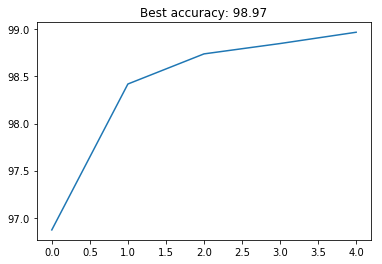

In [6]:
model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
train(model, criterion, train_loader, validation_loader, optimizer, 5)

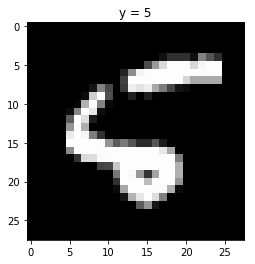

yhat:  tensor([6])


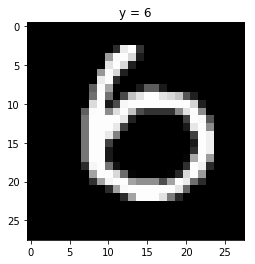

yhat:  tensor([0])


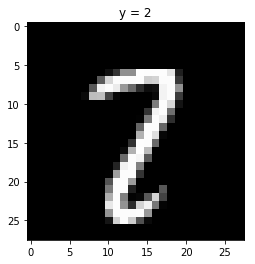

yhat:  tensor([7])


In [7]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = '+ str(data_sample[1].item()))

count = 0
for x, y in torch.utils.data.DataLoader(dataset=test_data, batch_size=1):
    z = model(x)
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat: ",yhat)
        count += 1
    if count >= 3:
        break  

In [26]:
url = 'https://s3.private.eu-de.cloud-object-storage.appdomain.cloud/neural-network-test-image-recognition/2.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
img

In [27]:
user_tensor = torch.from_numpy(np.array(img)).float()
yhat = model(user_tensor.view(1, 1, 28, 28))
_, label = torch.max(yhat, 1)
print(label.tolist()[0])

2


In [28]:
url = 'https://s3.private.eu-de.cloud-object-storage.appdomain.cloud/neural-network-test-image-recognition/3.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
img

In [29]:
user_tensor = torch.from_numpy(np.array(img)).float()
yhat = model(user_tensor.view(1, 1, 28, 28))
_, label = torch.max(yhat, 1)
print(label.tolist()[0])

3
